
Confusion Matrix (Train):
 [[5309  107]
 [ 373 1548]]

Confusion Matrix (Test):
 [[1300   55]
 [ 164  316]]

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      5416
           1       0.94      0.81      0.87      1921

    accuracy                           0.93      7337
   macro avg       0.93      0.89      0.91      7337
weighted avg       0.93      0.93      0.93      7337


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1355
           1       0.85      0.66      0.74       480

    accuracy                           0.88      1835
   macro avg       0.87      0.81      0.83      1835
weighted avg       0.88      0.88      0.88      1835


No continuous target variable found for regression metrics.


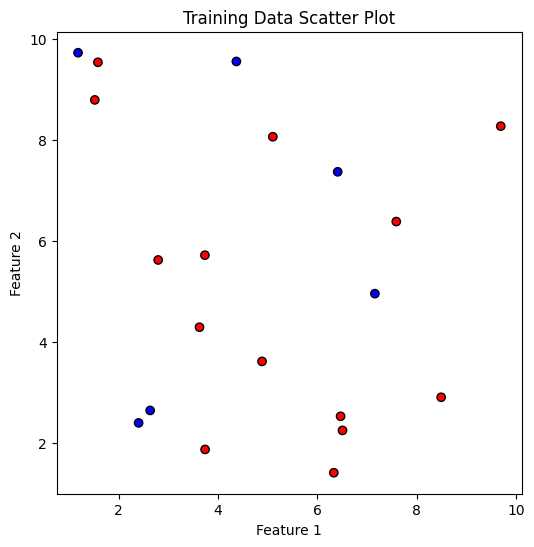

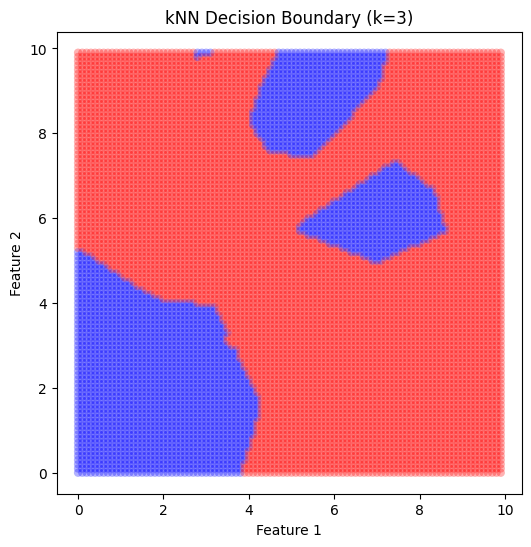

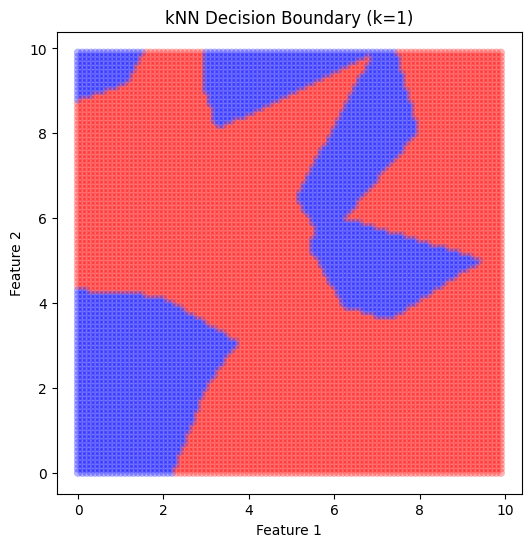

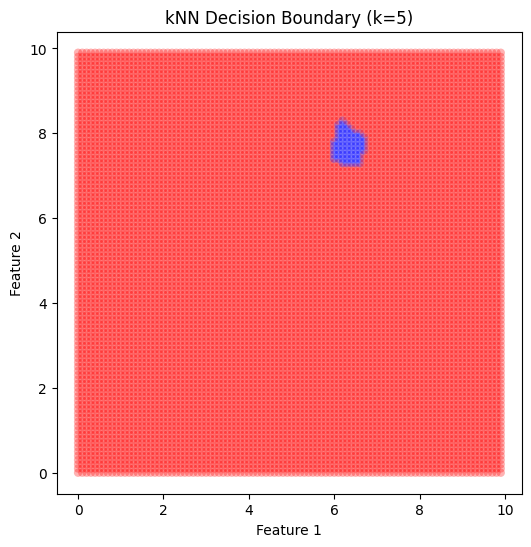

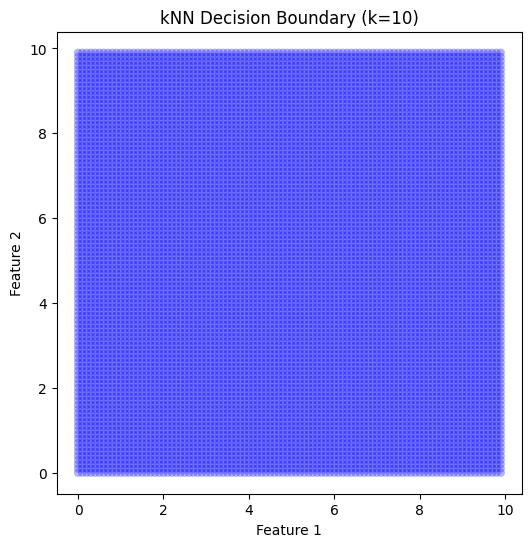

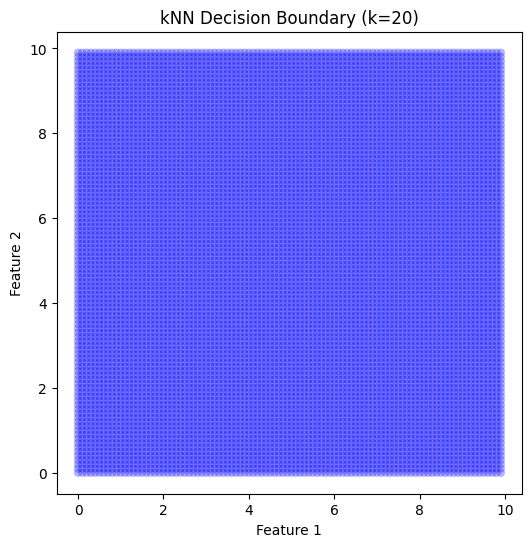

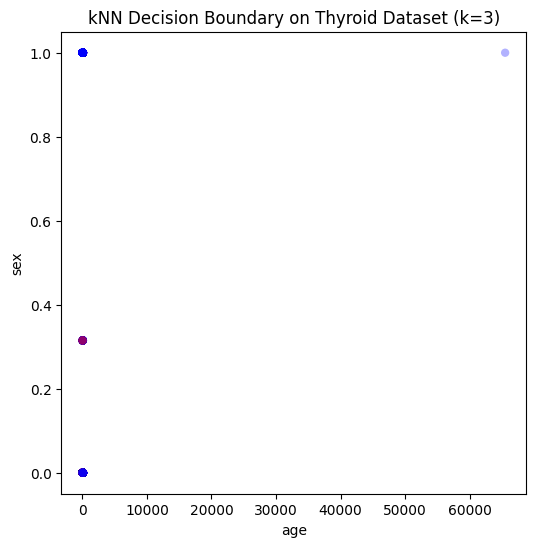


Best k Value Found: 1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
file_path = "cleaned_thyroid_data.csv"
df = pd.read_csv(file_path)

# Select Features and Target (Modify as per dataset)
X = df.iloc[:, :-1]  # All columns except the last (Features)
y = df.iloc[:, -1]   # Last column (Target variable)

# Encode categorical target variable if necessary
if y.dtype == 'O':
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split into training & test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features for kNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# A1: Confusion Matrix & Performance Metrics
# Train kNN classifier (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Compute Confusion Matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Display confusion matrices
print("\nConfusion Matrix (Train):\n", cm_train)
print("\nConfusion Matrix (Test):\n", cm_test)

# Compute precision, recall, F1-score
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))

# A2: Regression Error Metrics (For Continuous Prediction Tasks) ###
# Assuming there's a column for continuous target variable, otherwise skip this part
try:
    y_train_cont = X_train[:, 0]
    y_test_cont = X_test[:, 0]

    mse = mean_squared_error(y_train_cont, y_test_cont)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train_cont, y_test_cont)

    print(f"\nRegression Metrics:\nMSE: {mse}\nRMSE: {rmse}\nR2 Score: {r2}")
except:
    print("\nNo continuous target variable found for regression metrics.")

# A3-A5: Generate Random Data for kNN Visualization ###
np.random.seed(42)
X_train_vis = np.random.uniform(1, 10, (20, 2))  # 20 random points
y_train_vis = np.random.choice([0, 1], 20)  # Assign to two classes

# Scatter plot of training data
plt.figure(figsize=(6, 6))
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis, cmap='bwr', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data Scatter Plot')
plt.show()

# A4: Generate Test Data & Classify
X_test_vis = np.array([[x, y] for x in np.arange(0, 10, 0.1) for y in np.arange(0, 10, 0.1)])
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_train_vis, y_train_vis)
y_test_vis_pred = knn_vis.predict(X_test_vis)

# Scatter plot of test data classification
plt.figure(figsize=(6, 6))
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis_pred, cmap='bwr', alpha=0.3, edgecolor='none')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('kNN Decision Boundary (k=3)')
plt.show()

# A5: Observe kNN with Different k-values
for k in [1, 5, 10, 20]:
    knn_vis_k = KNeighborsClassifier(n_neighbors=k)
    knn_vis_k.fit(X_train_vis, y_train_vis)
    y_test_vis_pred_k = knn_vis_k.predict(X_test_vis)

    plt.figure(figsize=(6, 6))
    plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis_pred_k, cmap='bwr', alpha=0.3, edgecolor='none')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'kNN Decision Boundary (k={k})')
    plt.show()

# A6: Apply kNN on Thyroid Dataset
# Choose any 2 features for visualization
feature_1, feature_2 = X.columns[:2]
X_subset = df[[feature_1, feature_2]].values
y_subset = y

# Split and Train
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)
knn_sub = KNeighborsClassifier(n_neighbors=3)
knn_sub.fit(X_train_sub, y_train_sub)
y_test_sub_pred = knn_sub.predict(X_test_sub)

# Scatter plot of thyroid dataset
plt.figure(figsize=(6, 6))
plt.scatter(X_test_sub[:, 0], X_test_sub[:, 1], c=y_test_sub_pred, cmap='bwr', alpha=0.3, edgecolor='none')
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.title('kNN Decision Boundary on Thyroid Dataset (k=3)')
plt.show()

# A7: Hyperparameter Tuning with GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best k-value
print(f"\nBest k Value Found: {grid_search.best_params_['n_neighbors']}")
